<a href="https://colab.research.google.com/github/weathon/healthy-diet/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image
import pylab

In [12]:
# # Re-download the data.zip, run as needed
# !touch ~/.ssh/known_hosts
# !scp -o PreferredAuthentications="password" -o StrictHostKeyChecking=no wg25r@files.weasoft.com:/mnt/blockstorage/user/data.zip data.zip
# !unzip data.zip
!wget files.weasoft.com:9999/data.zip

--2022-12-31 06:14:12--  http://files.weasoft.com:9999/data.zip
Resolving files.weasoft.com (files.weasoft.com)... 66.42.65.160
Connecting to files.weasoft.com (files.weasoft.com)|66.42.65.160|:9999... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789758096 (753M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 753.17M  14.1MB/s    in 57s     

2022-12-31 06:15:10 (13.2 MB/s) - ‘data.zip’ saved [789758096/789758096]



In [ ]:
!unzip data.zip


### Load Data

In [14]:
X = []
Y = []
df = np.array(pd.read_csv("train_img.csv"))
for i in df:
    X.append(np.array(Image.open(f"train_images/train_images/{i[0]}").resize((128,128))))
    Y.append(i[1])

In [15]:
Y_mapping = {}
l = 0
for i in range(len(Y)):
    try:
        tmp = Y_mapping[Y[i]]
        Y[i] = tmp
    except:
        Y_mapping[Y[i]] = l
        Y[i] = l
        l+=1

In [16]:
for i in range(len(Y)):
    tmp = np.zeros_like([0]*(l+1))
    tmp[Y[i]] = 1
    Y[i] = tmp

### Model

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128,128,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    # tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    # tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    # tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    # tf.keras.layers.Conv2D(128,(3,3),activation="relu"), works much better without these layers 
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(len(Y_mapping.keys())+1, activation="relu"),
    tf.keras.layers.Dense(len(Y_mapping.keys())+1, activation="softmax")
])

In [65]:
X = np.array(X)
Y = np.array(Y)
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics="accuracy")

In [66]:
model.fit(X, Y, epochs=10)

Epoch 1/10
292/292 [==============================] - 13s 41ms/step - loss: 8.0996 - accuracy: 0.0762
Epoch 2/10
292/292 [==============================] - 12s 41ms/step - loss: 3.7743 - accuracy: 0.0983
Epoch 3/10
292/292 [==============================] - 12s 41ms/step - loss: 3.7246 - accuracy: 0.1109
Epoch 4/10
292/292 [==============================] - 12s 41ms/step - loss: 3.6437 - accuracy: 0.1245
Epoch 5/10
292/292 [==============================] - 12s 42ms/step - loss: 3.5209 - accuracy: 0.1466
Epoch 6/10
292/292 [==============================] - 12s 41ms/step - loss: 3.3474 - accuracy: 0.1838
Epoch 7/10
292/292 [==============================] - 12s 40ms/step - loss: 3.3634 - accuracy: 0.2004
Epoch 8/10
292/292 [==============================] - 12s 41ms/step - loss: 3.4788 - accuracy: 0.1761
Epoch 9/10
292/292 [==============================] - 12s 40ms/step - loss: 3.1570 - accuracy: 0.2374
Epoch 10/10
292/292 [==============================] - 12s 40ms/step - loss: 2.881

In [67]:
model.fit(X, Y, epochs=30)

Epoch 1/30
292/292 [==============================] - 12s 41ms/step - loss: 2.5838 - accuracy: 0.3672
Epoch 2/30
292/292 [==============================] - 12s 40ms/step - loss: 2.3659 - accuracy: 0.4221
Epoch 3/30
292/292 [==============================] - 12s 40ms/step - loss: 2.1635 - accuracy: 0.4700
Epoch 4/30
292/292 [==============================] - 12s 41ms/step - loss: 2.0362 - accuracy: 0.5031
Epoch 5/30
292/292 [==============================] - 12s 41ms/step - loss: 1.8480 - accuracy: 0.5541
Epoch 6/30
292/292 [==============================] - 12s 40ms/step - loss: 1.7134 - accuracy: 0.5878
Epoch 7/30
292/292 [==============================] - 12s 40ms/step - loss: 1.5296 - accuracy: 0.6332
Epoch 8/30
292/292 [==============================] - 12s 40ms/step - loss: 1.3874 - accuracy: 0.6650
Epoch 9/30
292/292 [==============================] - 12s 40ms/step - loss: 1.3299 - accuracy: 0.6807
Epoch 10/30
292/292 [==============================] - 12s 40ms/step - loss: 1.221

KeyboardInterrupt: ignored

In [ ]:
model.fit(X, Y, epochs=3)

In [33]:
model.save("model_2.h5")

In [34]:
!ls -l -h model.h5

-rw-r--r-- 1 root root 1.4G Dec 31 06:54 model.h5


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
!cp model.h5 drive/MyDrive/FoodMode.h5

In [38]:
reverseMap = {}
for i in Y_mapping.keys():
  reverseMap[Y_mapping[i]] = i

1/1 [==============================] - 0s 16ms/step


<Figure size 1600x1600 with 0 Axes>

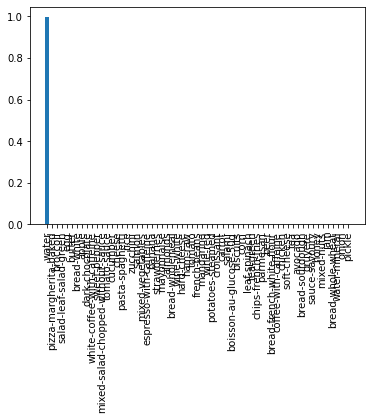

<Figure size 1600x1600 with 0 Axes>

In [59]:
id = 10
image = os.listdir("test_images/test_images/")[id]
pylab.bar(list(Y_mapping.keys()),model.predict(np.array([
    np.array(Image.open("test_images/test_images/"+image).resize((128,128)))
    ]))[0][:-1])#aaput kes in predict
pylab.xticks(rotation=90)
pylab.figure(figsize=(20,20), dpi=80)

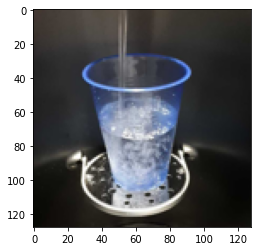

In [60]:
pylab.imshow(Image.open("test_images/test_images/"+image).resize((128,128)))